<a href="https://colab.research.google.com/github/veeramallu-sailusha/PREDICTIVE-ANALYSIS-USING-MACHINE-LEARNING/blob/main/CodTech_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request

In [ ]:
def download_and_prepare_data():
    # Download Iris dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    urllib.request.urlretrieve(url, "iris.csv")

    # Load and prepare dataset
    columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    df = pd.read_csv("iris.csv", names=columns)

    # Encode target variable
    le = LabelEncoder()
    df['species_encoded'] = le.fit_transform(df['species'])

    return df, le

In [ ]:
def prepare_features(df):
    # Separate features and target
    X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    y = df['species_encoded']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

In [ ]:
def train_and_evaluate_model(X_train, X_test, y_train, y_test, feature_names, le):
    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Feature importance
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance_df)
    plt.title('Feature Importance')
    plt.show()

    return model, importance_df


Preparing features...

Training and evaluating model...

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



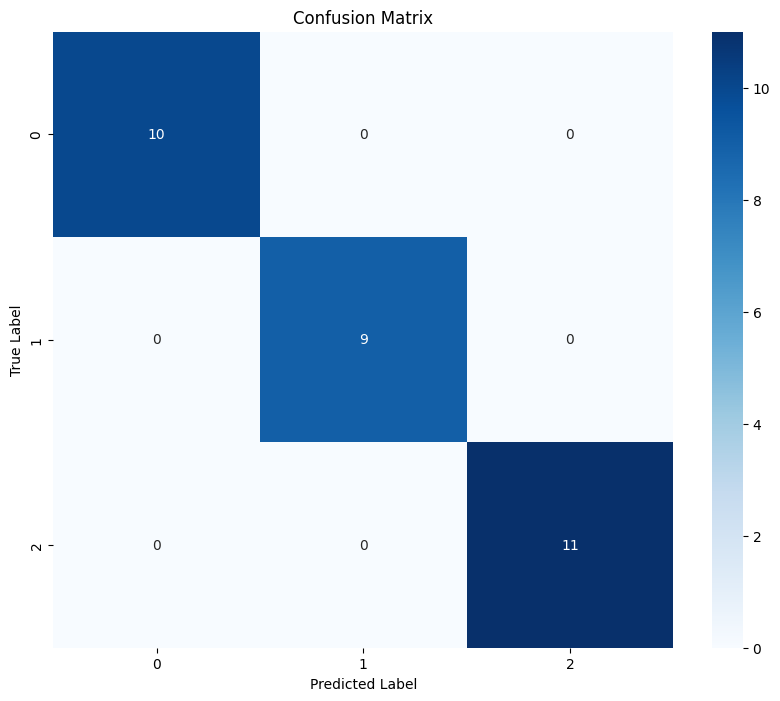

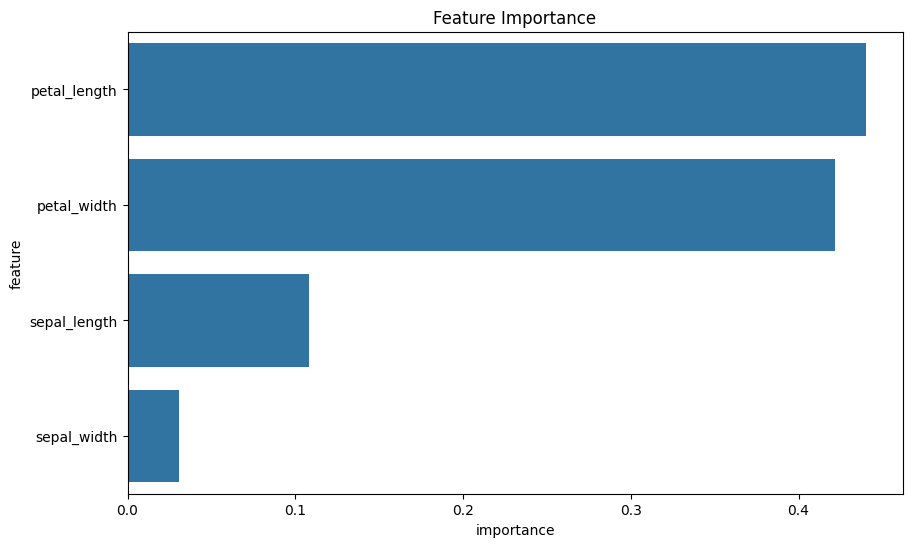


Feature Importance:
        feature  importance
2  petal_length    0.439994
3   petal_width    0.421522
0  sepal_length    0.108098
1   sepal_width    0.030387

Example Predictions:
Sample 1 - Predicted species: Iris-setosa
Sample 2 - Predicted species: Iris-virginica


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
def main():
    # Download and prepare data
    print("Downloading and preparing data...")
    df, le = download_and_prepare_data()

    # Prepare features
    print("\nPreparing features...")
    X_train, X_test, y_train, y_test, scaler = prepare_features(df)

    # Train and evaluate model
    print("\nTraining and evaluating model...")
    feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    model, importance_df = train_and_evaluate_model(
        X_train, X_test, y_train, y_test, feature_names, le
    )
    # Print feature importance
    print("\nFeature Importance:")
    print(importance_df)

    # Example predictions
    print("\nExample Predictions:")
    example_data = np.array([[5.1, 3.5, 1.4, 0.2],  # Sample iris measurements
                            [6.3, 3.3, 6.0, 2.5]])
    example_scaled = scaler.transform(example_data)
    predictions = model.predict(example_scaled)

    for i, pred in enumerate(predictions):
        print(f"Sample {i+1} - Predicted species: {le.inverse_transform([pred])[0]}")

if __name__ == "__main__":
    main()